<a href="https://colab.research.google.com/github/GitSamarth/data-generation-modelling-simulation-ml/blob/main/Data_Generation_using_Modelling_and_Simulation_for_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cantera Version: 3.2.0

Species: 53
Reactions: 325

Parameter Bounds:
Temperature: 800 - 1500 K
Pressure: 1 - 10 atm

Sample Data:
   Temperature_K  Pressure_atm  Specific_Heat
0     826.370693      1.620765    1275.252524
1    1433.114546      3.307525    1450.051909
2    1117.207471      3.767212    1375.235533
3    1018.127476      9.926419    1346.328007
4    1218.378814      6.185735    1401.889519

Dataset saved as cantera_simulated_data.csv


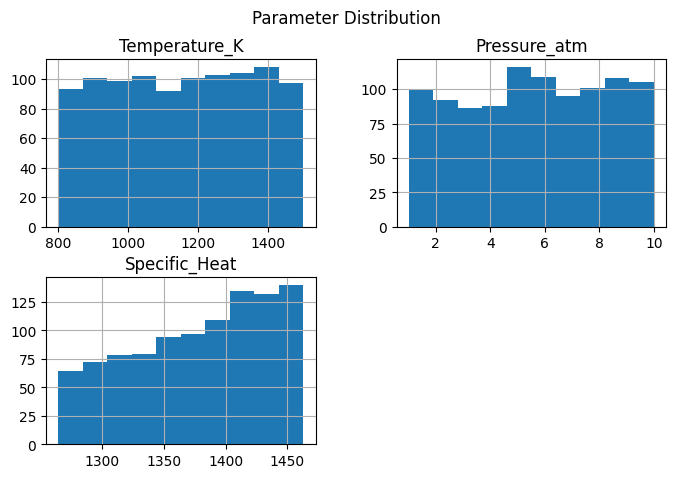


Model Comparison:
                       Model         MSE       MAE        R2
0          Linear Regression   33.235118  4.925261  0.989549
1              Decision Tree    0.092890  0.200074  0.999971
2              Random Forest    0.034585  0.136830  0.999989
3  Support Vector Regression  113.297857  5.774038  0.964372
4                        KNN    0.092516  0.234885  0.999971


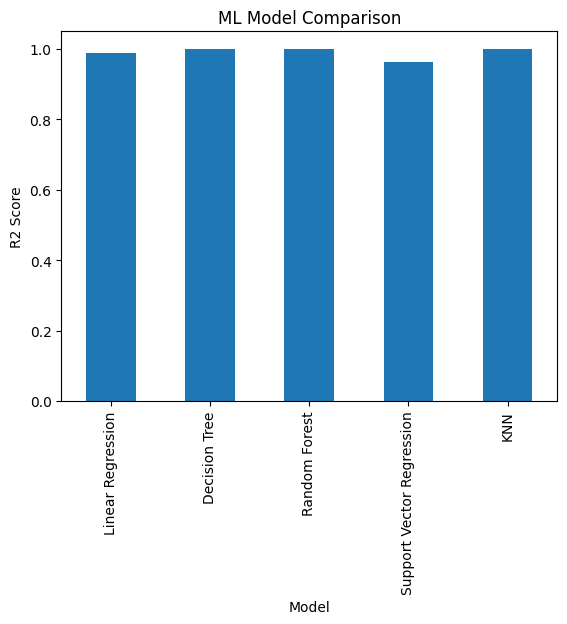


Best Model:
Model    Random Forest
MSE           0.034585
MAE            0.13683
R2            0.999989
Name: 2, dtype: object


In [2]:

# Install Cantera
!pip install cantera

import cantera as ct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

print("Cantera Version:", ct.__version__)


# 1. Load Chemical Mechanism


gas = ct.Solution("gri30.yaml")

print("\nSpecies:", gas.n_species)
print("Reactions:", gas.n_reactions)

# 2. Define Parameter Bounds


TEMP_MIN, TEMP_MAX = 800, 1500      # Kelvin
PRESS_MIN, PRESS_MAX = 1, 10       # atm

print("\nParameter Bounds:")
print("Temperature:", TEMP_MIN, "-", TEMP_MAX, "K")
print("Pressure:", PRESS_MIN, "-", PRESS_MAX, "atm")


# 3. Generate 1000 Simulations


records = []

for _ in range(1000):

    T = np.random.uniform(TEMP_MIN, TEMP_MAX)
    P = np.random.uniform(PRESS_MIN, PRESS_MAX)

    gas.TP = T, P * ct.one_atm
    gas.set_equivalence_ratio(1.0, "CH4", "O2:1,N2:3.76")

    # Physical property instead of reaction rate
    specific_heat = gas.cp

    records.append([T, P, specific_heat])


df = pd.DataFrame(records, columns=["Temperature_K", "Pressure_atm", "Specific_Heat"])

print("\nSample Data:")
print(df.head())

# 4. Save Dataset


df.to_csv("cantera_simulated_data.csv", index=False)
print("\nDataset saved as cantera_simulated_data.csv")


# 5. Visualization (Assignment Requirement)


df.hist(figsize=(8,5))
plt.suptitle("Parameter Distribution")
plt.show()


# 6. Machine Learning


X = df[["Temperature_K", "Pressure_atm"]]
y = df["Specific_Heat"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Support Vector Regression": SVR(),
    "KNN": KNeighborsRegressor()
}

results = []

for name, model in models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append([name, mse, mae, r2])

results_df = pd.DataFrame(
    results, columns=["Model", "MSE", "MAE", "R2"]
)

print("\nModel Comparison:")
print(results_df)


# 7. Model Comparison Plot


results_df.plot(x="Model", y="R2", kind="bar", legend=False)
plt.ylabel("R2 Score")
plt.title("ML Model Comparison")
plt.show()


# 8. Best Model


best = results_df.sort_values("R2", ascending=False).iloc[0]
print("\nBest Model:")
print(best)
